# Forest Cover Classification Portfolio Project

In this project, you will use deep learning to predict forest cover type (the most
common kind of tree cover) based only on cartographic variables. The actual forest
cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS)
Region 2 Resource Information System data. The covertypes are the following:

   - Spruce/Fir
   - Lodgepole Pine
   - Ponderosa Pine
   - Cottonwood/Willow
   - Aspen
   - Douglas-fir
   - Krummholz

Independent variables were then derived from data obtained from the US Geological Survey
and USFS. The data is raw and has not been scaled or preprocessed for you. It contains
binary columns of data for qualitative independent variables such as wilderness areas
and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest
of northern Colorado. These areas represent forests with minimal human-caused disturbances,
so existing forest cover types are mainly a result of ecological processes rather
than forest management practices.

Project Objectives:
   - Develop one or more classifiers for this multi-class classification problem.
   - Use TensorFlow with Keras to build your classifier(s).
   - Use your knowledge of hyperparameter tuning to improve the performance of your model(s).
   - Test and analyze performance.
   - Create clean and modular code.
    
## This is the first attempt

Using a NN with two middle layers of 64 and 32 neurons, a batch size of 1024, and 100 epochs. Trained using an Adam optimizer.

To see how well the model predicts after it's trained, we'll then plot accuracy and loss and also check the precision, recall and f1 score. We'll also plot a confusion matrix.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
dataset = pd.read_csv('cover_data.csv')
# print(dataset.info())
# print()
# print(dataset.head())
# print()
# print(dataset.describe())

In [75]:
labels = dataset.iloc[:,-1]
features = dataset.iloc[:,0:-1]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42, stratify=labels)

In [104]:
from sklearn.preprocessing import StandardScaler

stan_scaler = StandardScaler()
features_train_normalized = stan_scaler.fit_transform(features_train)
features_test_normalized = stan_scaler.transform(features_test)

print(features_train_scale.shape)

ct = ColumnTransformer([('numeric', StandardScaler(), ["Elevation", "Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])])

features_train_scale = ct.fit_transform(features_train)
features_test_scale = ct.transform(features_test)

print(features_train_scale.shape[1])
print(features_test_normalized.shape[1])

(389278, 10)
10
54


In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, InputLayer

# Build the model
model = keras.Sequential()
model.add(InputLayer(input_shape=(features_train_scale.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
#                     loss = tf.keras.losses.SparseCategoricalCrossentropy(),
#                     metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])

In [79]:
NUM_EPOCHS = 100
BATCH_SIZE = 1024
history = model.fit(features_train_scale, labels_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)

Epoch 1/100
343/343 [==============================] - 1s 3ms/step - loss: 0.8920 - accuracy: 0.6646 - val_loss: 0.6975 - val_accuracy: 0.7053
Epoch 2/100
343/343 [==============================] - 1s 2ms/step - loss: 0.6714 - accuracy: 0.7116 - val_loss: 0.6539 - val_accuracy: 0.7175
Epoch 3/100
343/343 [==============================] - 1s 3ms/step - loss: 0.6440 - accuracy: 0.7211 - val_loss: 0.6358 - val_accuracy: 0.7244
Epoch 4/100
343/343 [==============================] - 1s 2ms/step - loss: 0.6279 - accuracy: 0.7270 - val_loss: 0.6210 - val_accuracy: 0.7297
Epoch 5/100
343/343 [==============================] - 1s 2ms/step - loss: 0.6155 - accuracy: 0.7316 - val_loss: 0.6107 - val_accuracy: 0.7313
Epoch 6/100
343/343 [==============================] - 1s 2ms/step - loss: 0.6048 - accuracy: 0.7362 - val_loss: 0.6017 - val_accuracy: 0.7346
Epoch 7/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5962 - accuracy: 0.7395 - val_loss: 0.5948 - val_accuracy: 0.7378

Epoch 58/100
343/343 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.7855 - val_loss: 0.5037 - val_accuracy: 0.7803
Epoch 59/100
343/343 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7860 - val_loss: 0.5061 - val_accuracy: 0.7806
Epoch 60/100
343/343 [==============================] - 1s 2ms/step - loss: 0.4992 - accuracy: 0.7861 - val_loss: 0.5044 - val_accuracy: 0.7812
Epoch 61/100
343/343 [==============================] - 1s 2ms/step - loss: 0.4979 - accuracy: 0.7870 - val_loss: 0.5018 - val_accuracy: 0.7827
Epoch 62/100
343/343 [==============================] - 1s 2ms/step - loss: 0.4974 - accuracy: 0.7869 - val_loss: 0.5020 - val_accuracy: 0.7834
Epoch 63/100
343/343 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.7866 - val_loss: 0.5025 - val_accuracy: 0.7805
Epoch 64/100
343/343 [==============================] - 1s 2ms/step - loss: 0.4960 - accuracy: 0.7874 - val_loss: 0.4998 - val_accuracy:

In [80]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                704       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 8)                 264       
                                                                 
Total params: 3,048
Trainable params: 3,048
Non-trainable params: 0
_________________________________________________________________


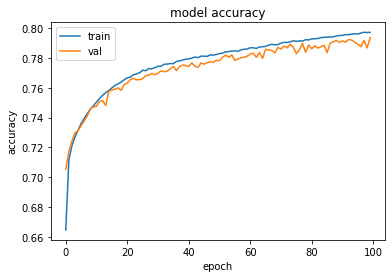

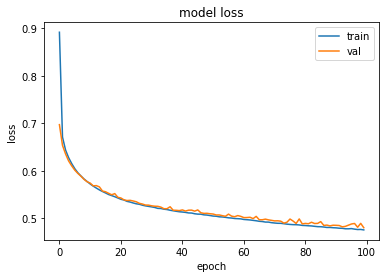

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

score = model.evaluate(features_test_scale, labels_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

prediction = model.predict(features_test_scale)
prediction = np.argmax(prediction, axis=1)

class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, prediction, target_names=class_names))

Test loss: 0.4836692214012146
Test accuracy: 0.7947729825973511
5992/5992 [==============================] - 5s 841us/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.78      0.80      0.79     69907
   Lodgepole Pine       0.82      0.83      0.82     93489
   Ponderosa Pine       0.79      0.77      0.78     11799
Cottonwood/Willow       0.75      0.69      0.72       907
            Aspen       0.76      0.35      0.47      3133
      Douglas-fir       0.64      0.52      0.57      5731
        Krummholz       0.82      0.74      0.78      6768

         accuracy                           0.79    191734
        macro avg       0.76      0.67      0.70    191734
     weighted avg       0.79      0.79      0.79    191734



In [98]:
prediction = model.predict(features_test_scale)
print(prediction)

5992/5992 [==============================] - 5s 784us/step
[[1.8173790e-14 7.3855463e-03 9.9259830e-01 ... 1.6211525e-05
  3.8837312e-11 1.6731987e-09]
 [4.2231288e-18 6.4382711e-08 6.4163953e-03 ... 6.1114015e-06
  8.8076685e-03 2.0476604e-21]
 [2.6064285e-19 8.3820802e-01 1.5056044e-01 ... 3.8324006e-17
  3.9562858e-25 1.1231555e-02]
 ...
 [2.6232022e-21 3.7738597e-01 6.2257761e-01 ... 3.6440386e-05
  3.2179592e-17 7.4148172e-15]
 [1.9567797e-13 5.2694287e-03 9.9472874e-01 ... 1.8211290e-06
  1.9849589e-08 6.2887649e-14]
 [1.2013876e-12 3.0026308e-01 6.2977386e-01 ... 3.5019405e-02
  2.8936805e-02 7.4902431e-08]]


In [99]:
prediction = np.argmax(prediction, axis=1)
print(prediction)

[2 3 1 ... 2 2 2]


In [101]:
print(labels_test)

219403    2
265378    3
344740    1
500765    7
188743    2
         ..
80383     2
471503    1
20201     2
62160     2
394936    2
Name: class, Length: 191734, dtype: int64


In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, prediction)

[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

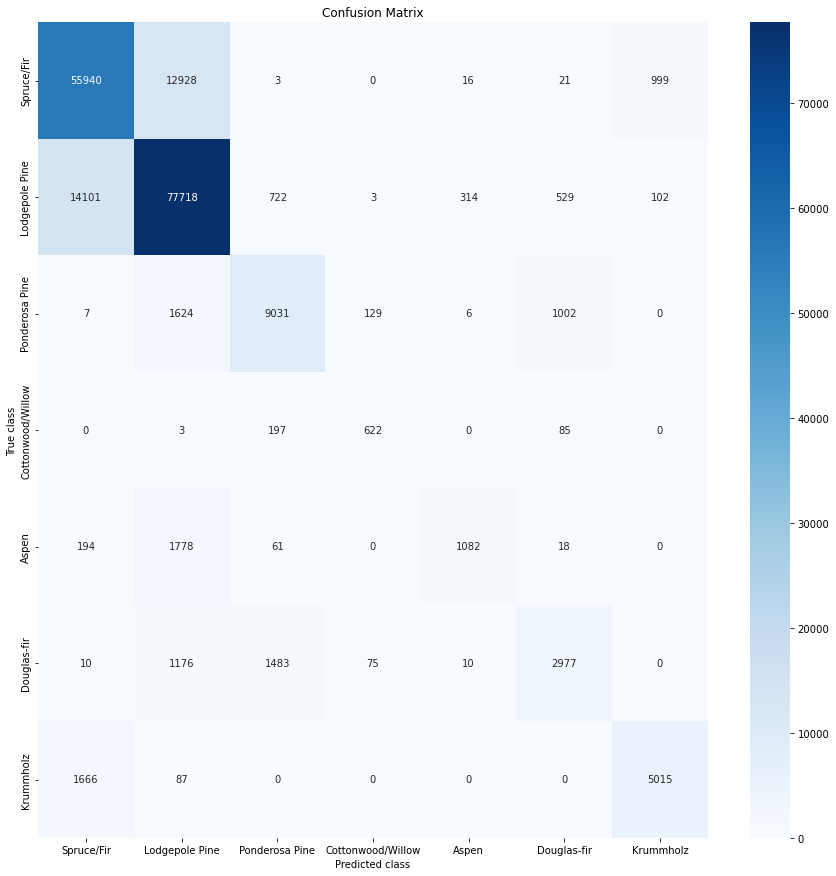

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)